In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.5 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293632 sha256=59fbb7737022670a2a4c630f5bceef801ac3815e3d54c39214f7b5e2317c4c0a
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [4]:


# Download historical stock data
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-09-17')

# Select the 'Close' price and reset the index
df = stock_data[['Close']].reset_index()

# Rename columns for clarity
df.columns = ['Date', 'Price']

# Set the 'Date' column as index
df.set_index('Date', inplace=True)

# Resample the data to have a regular daily frequency, and forward-fill missing values
df = df.resample('D').ffill()

# Check if the resampling worked
print(df.head())

[*********************100%***********************]  1 of 1 completed

                 Price
Date                  
2023-01-03  125.070000
2023-01-04  126.360001
2023-01-05  125.019997
2023-01-06  129.619995
2023-01-07  129.619995


In [5]:
# Convert the 'Price' column to a NumPy array
data = df['Price'].values.reshape(-1, 1)


In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [7]:
def create_sequences(data, time_steps=60):
    X = []
    y = []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_data, time_steps)


In [8]:

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]



In [9]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')



In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.1225 - val_loss: 0.0418
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0076 - val_loss: 0.0091
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0033 - val_loss: 0.0292
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0024 - val_loss: 0.0221
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0020 - val_loss: 0.0152
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0024 - val_loss: 0.0208
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0022 - val_loss: 0.0136
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0019 - val_loss: 0.0133
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0019 - val_loss: 0.0127
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0018 - val_loss: 0.0110
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0017 - val_loss: 0.0102
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0

In [13]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [14]:
# Inverse transform predictions and actual values
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


In [15]:
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

Train RMSE: 4.52
Test RMSE: 7.03


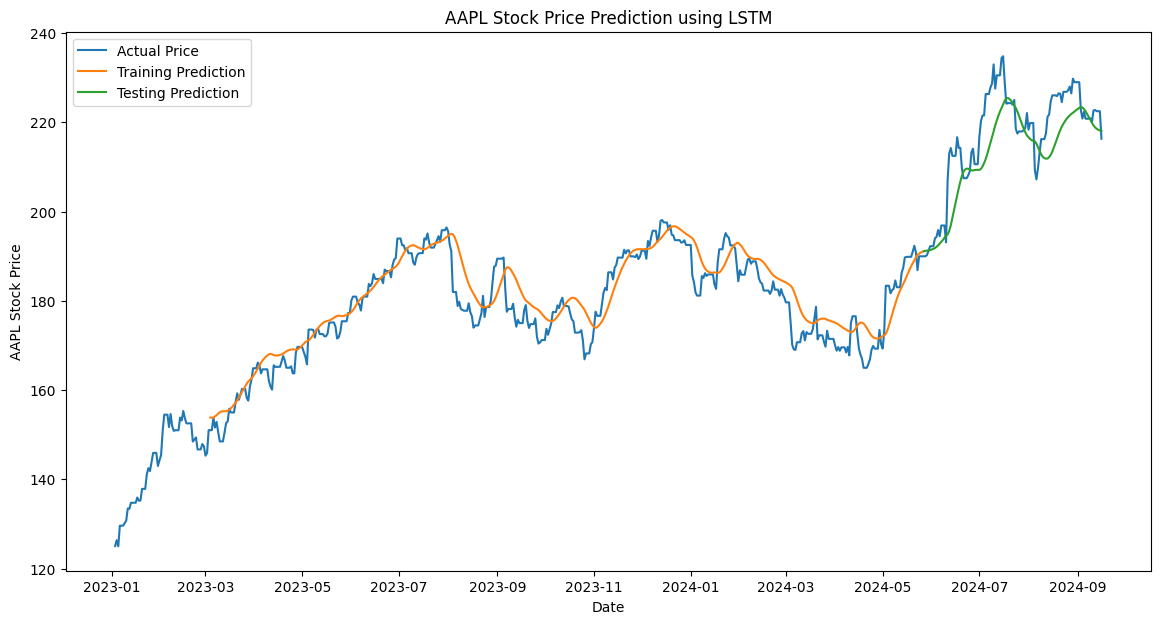

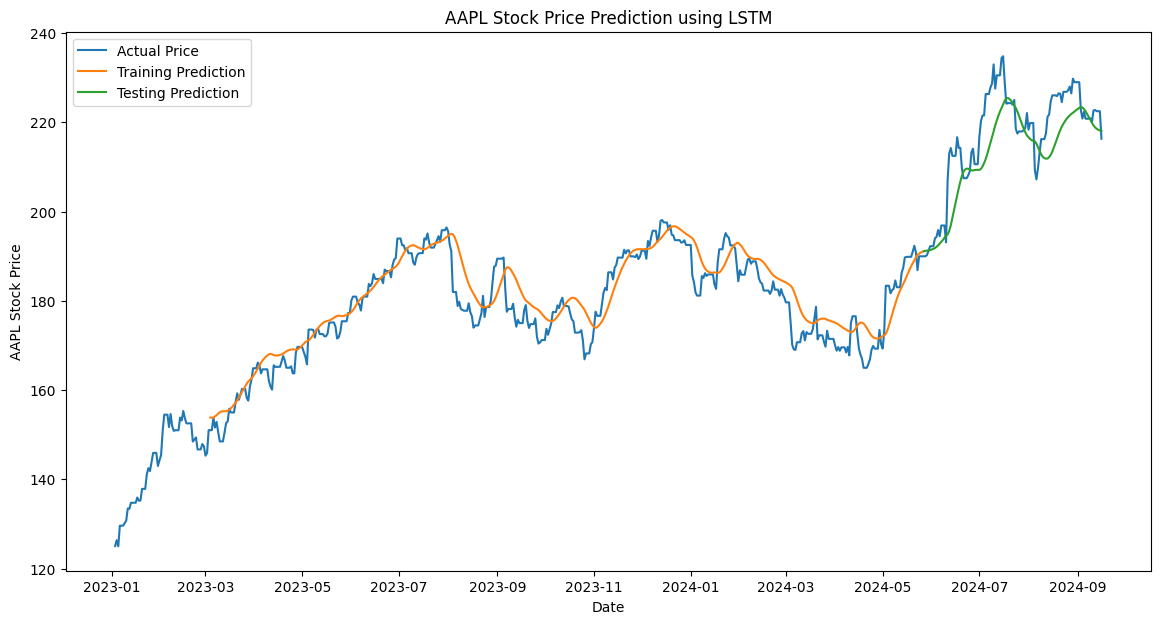

In [16]:
# Prepare data for plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_steps:split + time_steps, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[split + time_steps:, :] = test_predict

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(df.index, train_plot, label='Training Prediction')
plt.plot(df.index, test_plot, label='Testing Prediction')
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price')
plt.title('AAPL Stock Price Prediction using LSTM')
plt.legend()
plt.show()
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(df.index, train_plot, label='Training Prediction')
plt.plot(df.index, test_plot, label='Testing Prediction')
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price')
plt.title('AAPL Stock Price Prediction using LSTM')
plt.legend()
plt.show()


In [17]:
# Get the last 'time_steps' days
last_time_steps = scaled_data[-time_steps:]
last_time_steps = last_time_steps.reshape((1, time_steps, 1))

# Predict the next day
next_day_prediction = model.predict(last_time_steps)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
print(f'Predicted AAPL stock price for the next day: ${next_day_prediction[0][0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted AAPL stock price for the next day: $217.78
